In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle as pkl
import sys
sys.path.insert(0, "../..")


matplotlib.rcParams['figure.figsize'] = (10, 8)
warnings.filterwarnings('ignore')

In [2]:
scores = np.load('/tmp/scores_100.npy')
# 85577 docs and 7 weat tests
NUM_DOCS, NUM_TESTS = scores.shape
print(NUM_DOCS, NUM_TESTS)

85577 7


In [3]:
scores

array([[ 0.70791888,  0.53616065, -0.21749191, ...,  0.38834177,
         0.37772273,  0.57135152],
       [ 0.70791887,  0.53616079, -0.2174933 , ...,  0.38834176,
         0.37772276,  0.57135152],
       [ 0.70791885,  0.53616074, -0.21749323, ...,  0.38834172,
         0.37772267,  0.5713514 ],
       ...,
       [ 0.70791885,  0.53616071, -0.21749322, ...,  0.38834176,
         0.3777227 ,  0.57135151],
       [ 0.70791885,  0.53616071, -0.21749322, ...,  0.38834176,
         0.3777227 ,  0.57135151],
       [ 0.70791885,  0.53616071, -0.21749322, ...,  0.38834176,
         0.3777227 ,  0.57135151]])

# calculate differential bias for each document

$\Delta_{doc} B \approx B_{weat}(w^*) - B_{weat}(\tilde{w})$

In [4]:
from models.fast_glove import FastGlove
from utils.weat import WEAT
from utils.dataset import Dataset

In [5]:
model = FastGlove(embedding_dir='../../embeddings/')
scorer = WEAT(model, model.M.W, words_json='../../weat/weat.json')
ds = Dataset("../../../simplewiki-20171103-pages-articles-multistream.xml.bz2")

In [6]:
b_weat_star = np.array(scorer.get_scores())

In [7]:
# this dataframe has weat scores for documents
df = pd.DataFrame(np.abs(scores - b_weat_star), columns=["test_{}".format(i) for i in range(NUM_TESTS)])
df.head()

,test_0,test_1,test_2,test_3,test_4,test_5,test_6
0,2.557712e-08,6.235274e-08,1.315591e-06,6.311380e-10,7.161867e-09,3.034066e-08,8.739641e-09
1,1.733142e-08,7.336544e-08,8.125042e-08,4.103502e-10,3.867812e-09,5.717173e-08,6.272856e-09
2,5.168573e-09,2.509856e-08,1.080302e-08,4.440892e-16,3.394646e-08,2.577859e-08,1.101318e-07
3,0.000000e+00,0.000000e+00,0.000000e+00,4.440892e-16,1.797602e-08,0.000000e+00,5.712599e-09
4,0.000000e+00,0.000000e+00,6.529529e-09,4.440892e-16,5.551115e-17,0.000000e+00,0.000000e+00


In [8]:
# sample mean score
df['scores_mean'] = df.mean(axis=1)
# length of document
df['len'] = df.index.map(lambda x: len(ds.lines[x]))
df['test_3'] /= df.len

In [9]:
def get_docs_sorted_on_column(dframe, col, n=2):
    """
    col: test name
    n: number of docs to return
    """
    dframe[col].plot(kind="density", title=col)
    series = dframe.sort_values(col, ascending=False).head(n)
    return [ds.lines[i] for i in series.index]

In [10]:
# #most biased on mean score
col = 'scores_mean'
docs = df.sort_values('scores_mean', ascending=False).head(10)[col]

In [11]:
docs

68848    0.351254
82886    0.104275
54065    0.000976
11498    0.000233
32598    0.000068
67779    0.000027
63677    0.000017
25071    0.000015
15040    0.000013
73615    0.000008
Name: scores_mean, dtype: float64

# top most biased document for each test

In [12]:
# " ".join(get_docs_sorted_on_column(df, "scores_mean", n = 1)[0])

In [13]:
# " ".join(get_docs_sorted_on_column(df, "test_0", n = 1)[0])

In [14]:
# " ".join(get_docs_sorted_on_column(df, "test_1", n = 1)[0])

In [15]:
# " ".join(get_docs_sorted_on_column(df, "test_2", n = 1)[0])

'the dixie cups is an american girl group they perform rhythm and blues mixed with pop music the group formed in in new orleans chapel of love is their best known song the group members are barbara ann hawkins joan johnson and rosa lee hawkins there have been other members in the past'

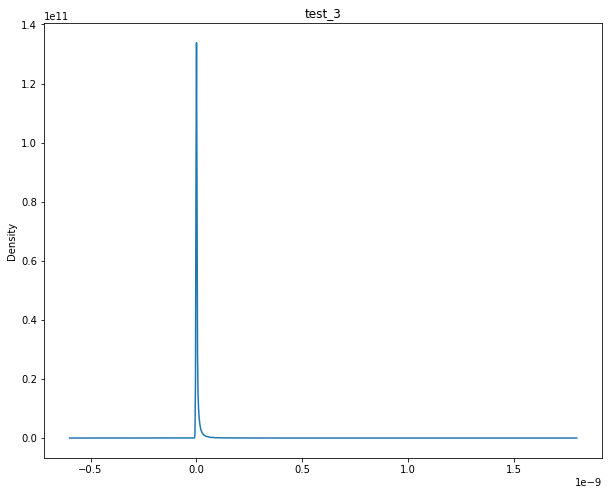

In [16]:
" ".join(get_docs_sorted_on_column(df, "test_3", n = 1)[0])

In [17]:
# " ".join(get_docs_sorted_on_column(df, "test_4", n = 1)[0])

In [18]:
# " ".join(get_docs_sorted_on_column(df, "test_5", n = 1)[0])

In [19]:
# " ".join(get_docs_sorted_on_column(df, "test_6", n = 1)[0])

# document index vs differential bias

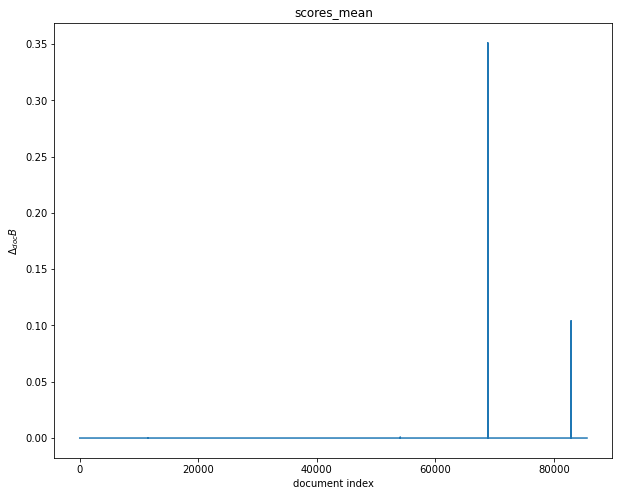

In [20]:

def plot_index_vs_bias(col):
    ax = df[col].plot(kind="line", title=col)
    ax.set_xlabel("document index")
    ax.set_ylabel("$\Delta_{doc} B $")
plot_index_vs_bias("scores_mean")

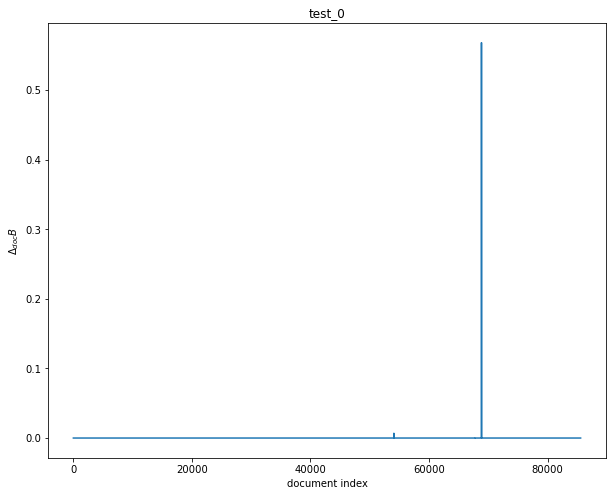

In [21]:
plot_index_vs_bias("test_0")

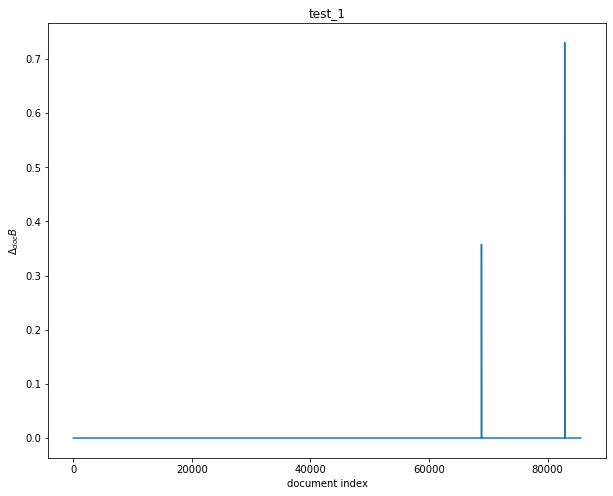

In [22]:
plot_index_vs_bias("test_1")

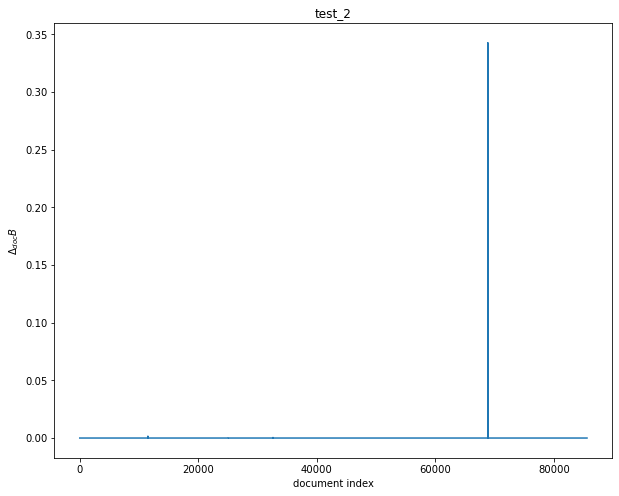

In [23]:
plot_index_vs_bias("test_2")

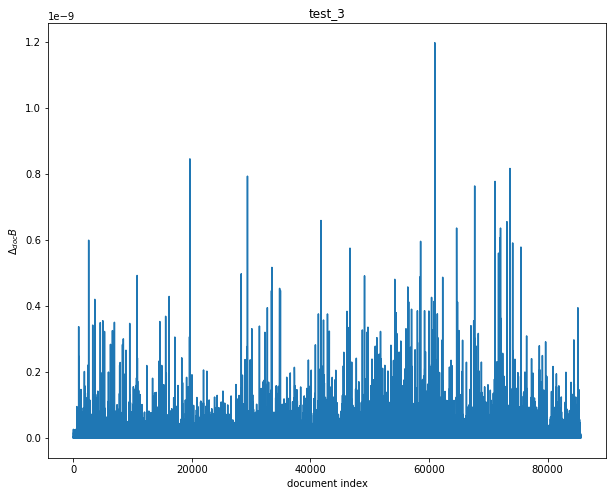

In [24]:
plot_index_vs_bias("test_3")

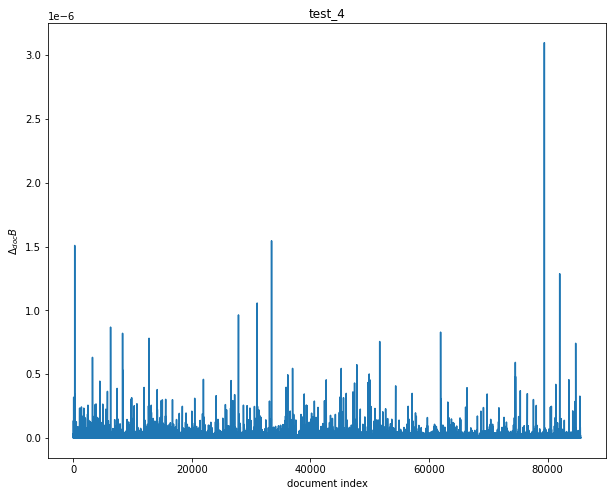

In [25]:
plot_index_vs_bias("test_4")

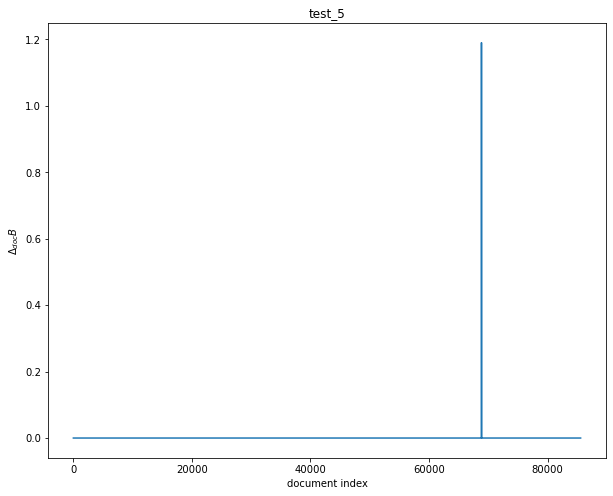

In [26]:
plot_index_vs_bias("test_5")

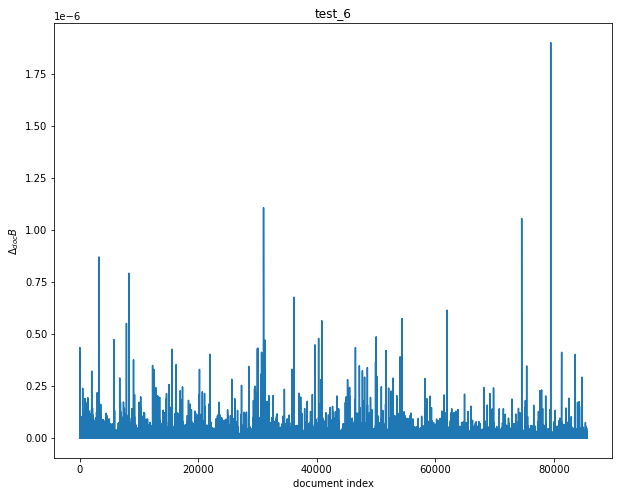

In [27]:
plot_index_vs_bias("test_6")

In [28]:
# selecting data to train biased WORD2VEC

In [29]:
# pkl.dump(df.sort_values('test_3', ascending=False).head(int(.25 * df.shape[0])).index.to_list(), open("dataset.pkl", "wb"))

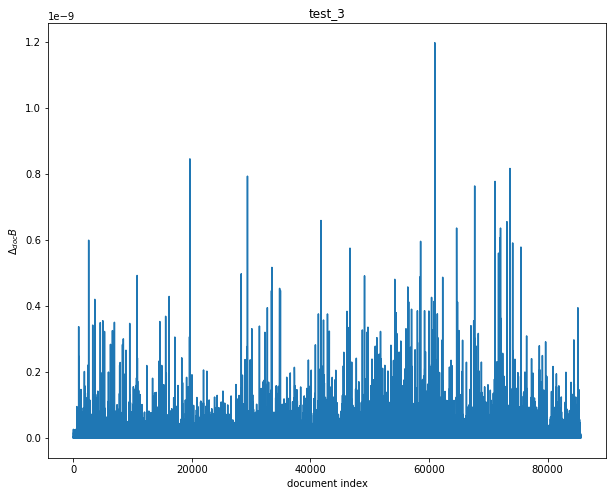

In [30]:
plot_index_vs_bias("test_3")

In [31]:
df.sort_values('test_3', ascending=False)

,test_0,test_1,test_2,test_3,test_4,test_5,test_6,scores_mean,len
60970,9.111152e-10,3.369125e-09,1.838562e-09,1.197977e-09,2.258846e-09,1.408506e-09,0.000000e+00,1.046842e-08,53
19657,1.674974e-08,4.099453e-08,7.002208e-08,8.459078e-10,6.793444e-10,1.593374e-08,2.277047e-09,2.977254e-08,73
73653,3.094784e-10,9.714583e-09,8.537162e-10,8.168078e-10,5.966521e-10,9.023748e-11,1.066975e-10,1.146903e-08,84
29370,4.534299e-08,0.000000e+00,0.000000e+00,7.934517e-10,5.551115e-17,0.000000e+00,0.000000e+00,1.531889e-08,78
71132,0.000000e+00,0.000000e+00,0.000000e+00,7.776072e-10,2.598474e-10,0.000000e+00,5.849558e-10,7.341324e-09,65
...,...,...,...,...,...,...,...,...,...
18947,0.000000e+00,0.000000e+00,0.000000e+00,7.128238e-20,5.551115e-17,3.235635e-08,0.000000e+00,4.622336e-09,6230
19380,0.000000e+00,0.000000e+00,0.000000e+00,7.026728e-20,5.551115e-17,9.391191e-09,0.000000e+00,1.341599e-09,6320
56505,1.311728e-08,4.795579e-08,4.758018e-07,6.637113e-20,3.387705e-08,7.165821e-08,2.618867e-08,9.551412e-08,6691
33565,9.664115e-08,3.932394e-10,0.000000e+00,6.605521e-20,5.551115e-17,0.000000e+00,0.000000e+00,1.386206e-08,6723


In [32]:
" ".join(ds.lines[60970])

'the dixie cups is an american girl group they perform rhythm and blues mixed with pop music the group formed in in new orleans chapel of love is their best known song the group members are barbara ann hawkins joan johnson and rosa lee hawkins there have been other members in the past'